In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

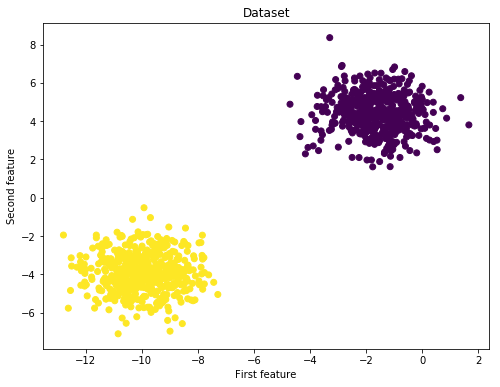

In [4]:
np.random.seed(1)

# perform logistic regression using a simple toy dataset of two classes
X, y_true = make_blobs(n_samples= 1000, n_features=2, centers=2)
data_y_true = y_true

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [5]:
# Reshape targets to get column vector with shape (n_samples, 1)
y_true = y_true[:, np.newaxis]
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

print('Shape X_train: ' + str(X_train.shape))
print('Shape y_train: ' + str(y_train.shape))
print('Shape X_test: ' + str(X_test.shape)) 
print('Shape y_test: ' + str(y_test.shape))

Shape X_train: (750, 2)
Shape y_train: (750, 1)
Shape X_test: (250, 2)
Shape y_test: (250, 1)


In [6]:
class LogisticRegression:
    def __init__(self):
        pass

    def sigmoid(self, a):
        return 1 / (1 + np.exp(-a))

    def train(self, X, y_true, n_iters, learning_rate):
        """
        Trains the logistic regression model on given data X and targets y
        """
        # Step 0: Initialize the parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        costs = []

        for i in range(n_iters):
            # Step 1 and 2: Compute a linear combination of the input features and weights,
            # apply the sigmoid activation function
            y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)

            # Step 3: Compute the cost over the whole training set.
            cost = (float(-1) / n_samples) * np.sum(y_true * np.log(y_predict) + (1 - y_true) * (np.log(1 - y_predict)))
            # Step 4: Compute the gradients
            dw = (float(1) / n_samples) * np.dot(X.T, (y_predict - y_true))
            db = (float(1) / n_samples) * np.sum(y_predict - y_true)

            # Step 5: Update the parameters
            self.weights = self.weights - learning_rate * dw
            self.bias = self.bias - learning_rate * db

            costs.append(cost)
            if i % 100 == 0:
                print("Cost after iteration " + str(i) + ": " + str(cost))

        return self.weights, self.bias, costs

    def predict(self, X):
        """
        Predicts binary labels for a set of examples X.
        """
        y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_predict_labels = [1 if elem > 0.5 else 0 for elem in y_predict]

        return np.array(y_predict_labels)[:, np.newaxis]


Cost after iteration 0: 0.69314718056
Cost after iteration 100: 0.0706973904946
Cost after iteration 200: 0.0383762248596
Cost after iteration 300: 0.0267352524817
Cost after iteration 400: 0.0206989017001
Cost after iteration 500: 0.0169858815971


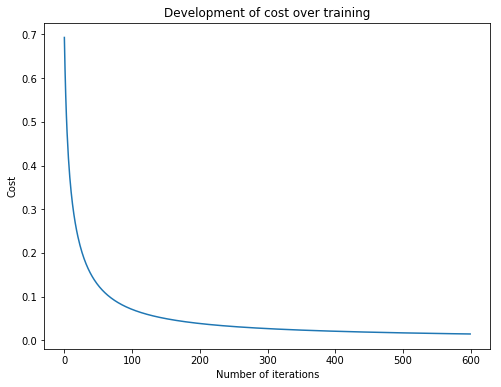

In [7]:
# Initializing and training the model
regressor = LogisticRegression()
w_trained, b_trained, costs = regressor.train(X_train, y_train, n_iters=600, learning_rate=0.009)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(600), costs)
plt.title("Development of cost over training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [8]:
# Testing the model
y_p_train = regressor.predict(X_train)
y_p_test = regressor.predict(X_test)

print("train accuracy: " + str(100 - np.mean(np.abs(y_p_train - y_train))) + "%")
print("test accuracy: " + str(100 - np.mean(np.abs(y_p_test - y_test))) + "%")

train accuracy: 100.0%
test accuracy: 100.0%


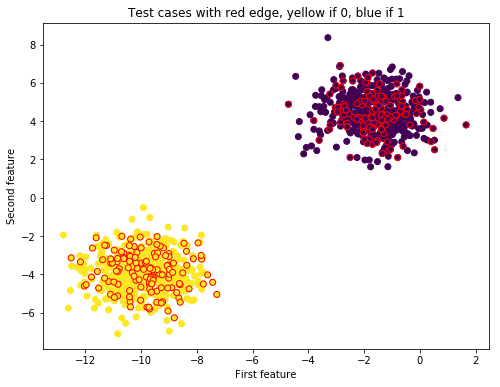

In [9]:
# Visualize test predictions
fig = plt.figure(figsize=(8,6))
plt.title("Test cases with red edge, yellow if 0, blue if 1")
plt.scatter(X[:,0], X[:,1], c=data_y_true)
plt.scatter(X_test[:,0], X_test[:,1], c=y_p_test, linewidths=1,  edgecolors="red")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()